# Contexto 

O circuit breaker é uma ferramenta de segurança utilizada para interromper todas as operações da Bovespa. Ela é disparada quando ocorrem fortes quedas atípicas nos preços das ações.

A interrupção de todas as operações com o circuit breaker serve para proteger e amortecer a oscilação excessiva no mercado. Com esta pausa, é esperado que ocorra um balanceamento entre a compra e a venda de ativos, evitando uma nova queda, ainda mais brusca.

As regras para o Circuit Breaker na Bovespa são bastante simples. Você vai precisar entender o processo da paralisação na Bolsa de Valores e compreender a sequência percentual - porcentagem de queda para negociações ficarem suspensas.

Queda de 10%: 
Quando o Ibovespa (índice principal da Bolsa de Valores brasileira) apresenta uma queda de mais de 10% sobre o índice de fechamento do pregão anterior, então o primeiro circuit breaker é acionado. Com ele, todas as atividades são interrompidas por 30 minutos.

Queda de 15%:
Após finalizados os 30 minutos de pausa, as operações são reabertas. Caso o Ibovespa continue caindo, chegando numa queda acumulada de 15%, então ocorrerá uma nova interrupção nas negociações, neste caso por mais 1 hora.

Queda de 20%:
Após a pausa de 1 hora, novamente ocorre a reabertura nas operações da Bolsa. Entretanto, caso o Ibovespa caía 20% em relação ao fechamento anterior, a Bovespa definirá o prazo em que as operações ficarão suspensas.

Em 2020, o circuit breaker foi acionado no Brasil 6 vezes em 8 pregões, devido as reaçãos do mercado com o avançar da pandemia (Covid-19)

Iremos analisar a probabilidade desse evento ocorrer novamente...


## Configurações Inicias

Importando as bibliotecas

In [1]:
import yfinance as yf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [3]:
import warnings

In [4]:
from scipy.stats import norm, t

In [5]:
sns.set()

matplotlib.rcParams['figure.figsize'] = (16,8)
matplotlib.rcParams.update({'font.size': 22})

warnings.filterwarnings('ignore')

## Analise Estatistica do IBOV

Coletando os Dados

In [6]:
ibov = yf.download("^BVSP")[["Adj Close"]]
ibov

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
1993-04-27,24.500000
1993-04-28,24.299999
1993-04-29,23.700001
1993-04-30,24.100000
1993-05-03,24.100000
...,...
2021-01-05,119223.000000
2021-01-06,119851.000000
2021-01-07,121956.000000


In [7]:
ibov["Retorno"] = ibov["Adj Close"].pct_change()
ibov.dropna(inplace=True)
ibov

,Adj Close,Retorno
Date,,
1993-04-28,24.299999,-0.008163
1993-04-29,23.700001,-0.024691
1993-04-30,24.100000,0.016878
1993-05-03,24.100000,0.000000
1993-05-04,24.900000,0.033195
...,...,...
2021-01-05,119223.000000,0.005609
2021-01-06,119851.000000,0.005267
2021-01-07,121956.000000,0.017563


In [8]:
media_ibov = ibov['Retorno'].mean()
print('Retorno médio = {:.2f}%'.format(media_ibov*100))

Retorno médio = 0.15%


In [10]:
desvio_padrao_ibov = ibov['Retorno'].std()
print('Desvio padrão = {:.2f}%'.format(desvio_padrao_ibov*100))

Desvio padrão = 2.26%


In [11]:
ibov[ibov['Retorno'] > -0.12]

,Adj Close,Retorno
Date,,
1993-04-28,24.299999,-0.008163
1993-04-29,23.700001,-0.024691
1993-04-30,24.100000,0.016878
1993-05-03,24.100000,0.000000
1993-05-04,24.900000,0.033195
...,...,...
2021-01-05,119223.000000,0.005609
2021-01-06,119851.000000,0.005267
2021-01-07,121956.000000,0.017563


Qual a probabilidade do ibov cair mais que 12% considerando que os retornos seguem uma distribuição normal?

In [12]:
probabilidade_teorica = norm.cdf(-0.12,loc= media_ibov,scale=desvio_padrao_ibov)
print('{:.8f}%'.format(probabilidade_teorica*100))

0.00000391%


In [13]:
frequencia_teorica = 1 / probabilidade_teorica
print('Uma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Uma vez a cada 25585552 dias
Ou uma vez a cada 101529 anos


ANALISE COM ERRO GROSSEIRO, RESULTADO INVIAVEL

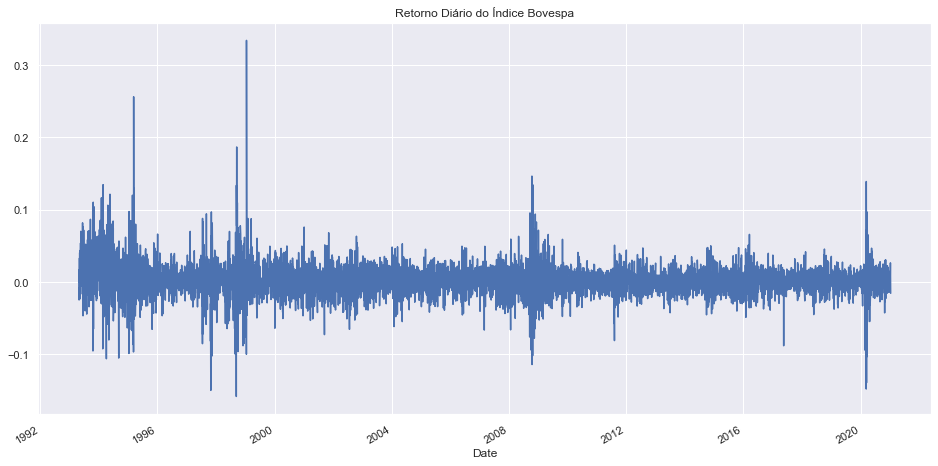

In [14]:
ibov['Retorno'].plot(title="Retorno Diário do Índice Bovespa");

In [15]:
ibov['Retorno_Teorico'] = norm.rvs(size=ibov['Retorno'].size,  loc=media_ibov, scale=desvio_padrao_ibov)

(-0.2, 0.4)

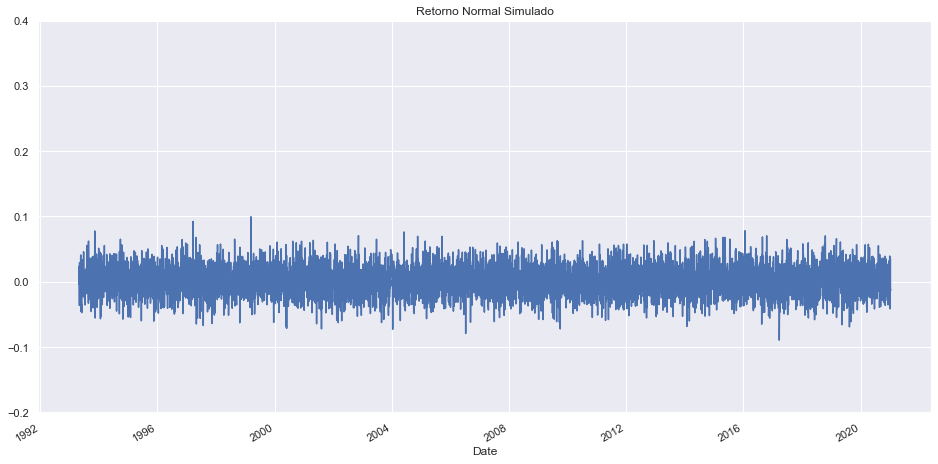

In [16]:
ax = ibov['Retorno_Teorico'].plot(title="Retorno Normal Simulado");
ax.set_ylim(-0.2, 0.4)

<AxesSubplot:xlabel='Retorno'>

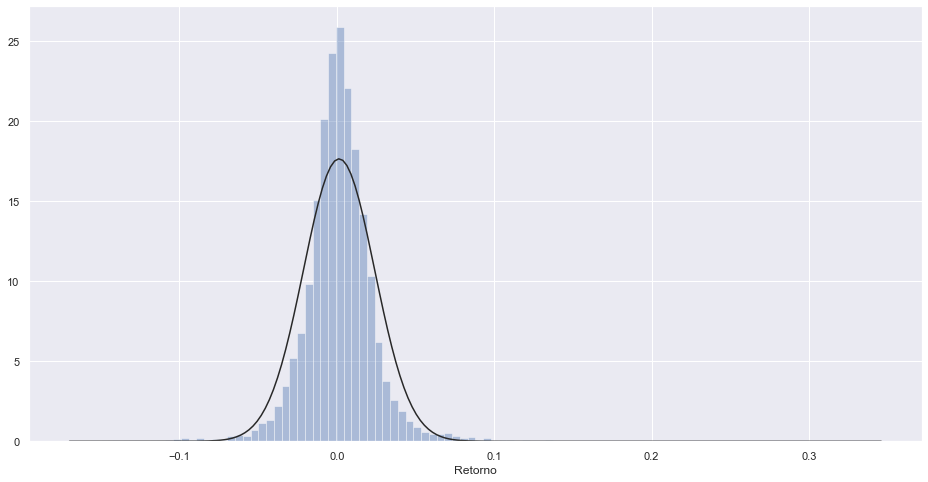

In [18]:
sns.distplot(ibov['Retorno'], bins=100, kde=False, fit=norm)

É possivel observar que os dados nao se assemelham a uma distribuição normal

Recalculando, considerando os como como uma distribuição do tipo t-student

<AxesSubplot:xlabel='Retorno'>

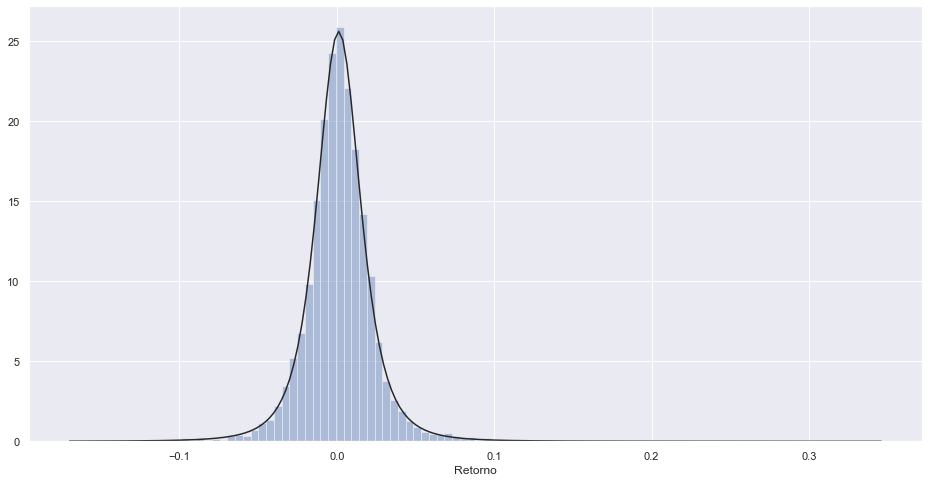

In [19]:
sns.distplot(ibov['Retorno'], bins=100, kde=False, fit=t)

In [20]:
(graus_de_liberdade,  media_t, desvio_padrao_t) = t.fit(ibov['Retorno'])
print('Distribuição T-Student\nGraus de liberdade={:.2f} \nMédia={:.4f} \nDesvio padrão={:.5f}'.format(graus_de_liberdade, media_t, desvio_padrao_t))

Distribuição T-Student
Graus de liberdade=3.27 
Média=0.0013 
Desvio padrão=0.01446


In [21]:
probabilidade_teorica_t = t.cdf(-0.12, graus_de_liberdade,  loc=media_t, scale=desvio_padrao_t)
print('{:.8f}%'.format(probabilidade_teorica_t*100))

0.12687981%


In [22]:
frequencia_teorica_t = 1 / probabilidade_teorica_t
print('Para uma distribuição T-Student: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição T-Student: 
Uma vez a cada 788 dias
Ou uma vez a cada 3 anos


O resultado aproxima-se da realidade

In [25]:
frequencia_observada = ibov['Retorno'].size / ibov[ibov["Retorno"] < -0.12].shape[0] 
print('Na vida real aconteceu: \nUma vez a cada {} dias'.format(int(round(frequencia_observada, 5))))

Na vida real aconteceu: 
Uma vez a cada 1370 dias
